<a href="https://colab.research.google.com/github/yaswanth2911/TrafficTelligence-Advanced-Traffic-Volume-Estimation-with-Machine-Learning/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Data handling
import pandas as pd       # For data manipulation using DataFrames
import numpy as np        # For numerical computations

# Visualization
import seaborn as sns     # For advanced statistical plots

# Scikit-learn (ML)
import sklearn as sk                      # Entire sklearn module (generally not used like this)
from sklearn import linear_model         # For linear models like LinearRegression, LogisticRegression
from sklearn import tree                 # For decision tree models
from sklearn import ensemble             # For ensemble methods like RandomForest, GradientBoosting
from sklearn import svm                  # For Support Vector Machines

# XGBoost (Advanced boosting algorithm)
import xgboost                           # For extreme gradient boosting models


In [15]:
# Importing the data
data = pd.read_csv("/traffic volume.csv")


In [16]:
# Displaying the first 5 rows of the data
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [17]:
data.describe()


,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [19]:
from collections import Counter  # Make sure this is imported

# Display null values for each column
print(data.isnull().sum())

# Fill missing numerical values with the column mean
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)

# Check unique weather values and their counts, including missing (NaN)
print(Counter(data['weather']))

# Fill missing weather values with the most frequent one ('Clouds')
data['weather'].fillna('Clouds', inplace=True)


holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64
Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


<ipython-input-19-b8a9369e8d2a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(), inplace=True)
<ipython-input-19-b8a9369e8d2a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

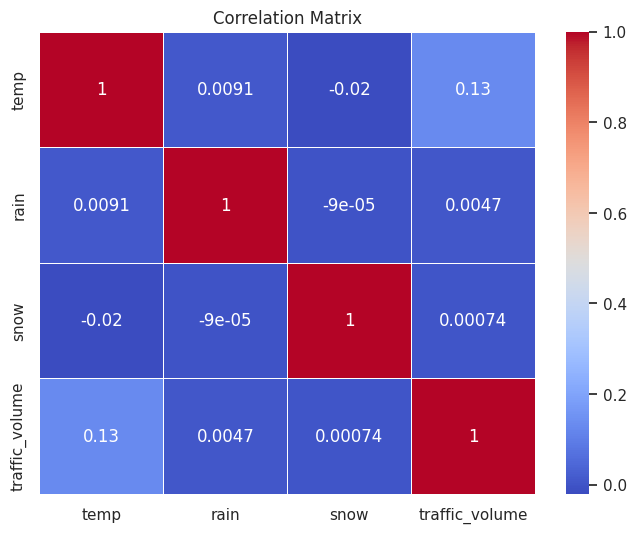

In [35]:
# Only include numeric columns in the correlation calculation
numeric_data = data.select_dtypes(include='number')
correlation = numeric_data.corr()

# Visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



In [36]:
data['holiday_encoded'] = data['holiday'].astype('category').cat.codes


<Axes: >

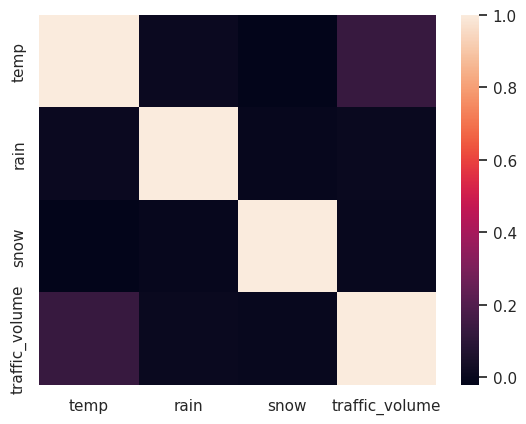

In [39]:
sns.heatmap(corr_matrix)


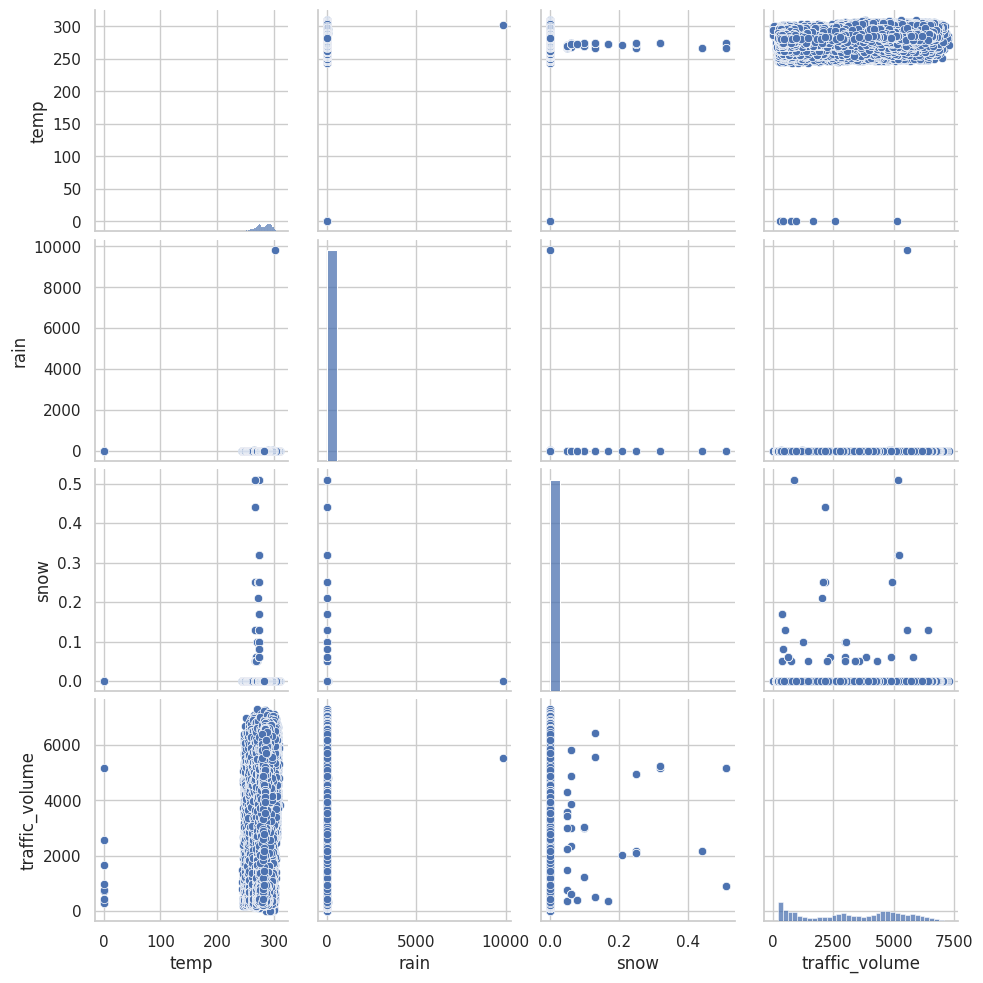

In [23]:
sns.pairplot(data)

<Axes: >

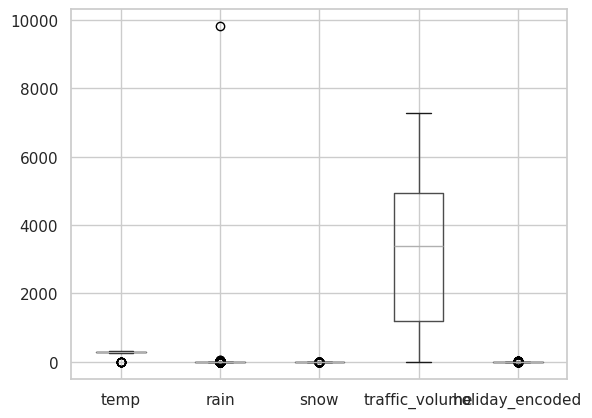

In [40]:
data.boxplot()

In [43]:
# Split date column into day, month, year
data[['day', 'month', 'year']] = data['date'].str.split('-', expand=True)

# Split Time column into hours, minutes, seconds
data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(':', expand=True)

# Drop original date and Time columns
data.drop(columns=['date', 'Time'], inplace=True)

# Display first few rows
data.head()


,holiday,temp,rain,snow,weather,traffic_volume,holiday_encoded,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,-1,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,-1,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,-1,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,-1,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,-1,02,10,2012,13,00,00


In [47]:
# Separate target and features
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)

# Convert categorical columns (e.g., 'holiday', 'weather') to dummy/indicator variables
x = pd.get_dummies(x, columns=['holiday', 'weather'], drop_first=True)

# Now scale the numeric data
from sklearn.preprocessing import scale

x_scaled_array = scale(x)

# Convert scaled data back to DataFrame with column names
x_scaled = pd.DataFrame(x_scaled_array, columns=x.columns)

print(x_scaled.head())


       temp      rain      snow  holiday_encoded       day    month      year  \
0  0.530485 -0.007463 -0.027235        -0.031467 -1.574903  1.02758 -1.855294   
1  0.611467 -0.007463 -0.027235        -0.031467 -1.574903  1.02758 -1.855294   
2  0.627964 -0.007463 -0.027235        -0.031467 -1.574903  1.02758 -1.855294   
3  0.669205 -0.007463 -0.027235        -0.031467 -1.574903  1.02758 -1.855294   
4  0.744939 -0.007463 -0.027235        -0.031467 -1.574903  1.02758 -1.855294   

      hours  minutes  seconds  ...  weather_Clouds  weather_Drizzle  \
0 -0.345548      0.0      0.0  ...        1.474034        -0.197972   
1 -0.201459      0.0      0.0  ...        1.474034        -0.197972   
2 -0.057371      0.0      0.0  ...        1.474034        -0.197972   
3  0.086718      0.0      0.0  ...        1.474034        -0.197972   
4  0.230807      0.0      0.0  ...        1.474034        -0.197972   

   weather_Fog  weather_Haze  weather_Mist  weather_Rain  weather_Smoke  \
0    -0.138

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [49]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()


In [56]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)


In [59]:
from sklearn import metrics

print(metrics.r2_score(y_train, p1))
print(metrics.r2_score(y_train, p2))
print(metrics.r2_score(y_train, p3))
print(metrics.r2_score(y_train, p4))
print(metrics.r2_score(y_train, p5))


0.14317359359847404
1.0
0.976497033726149
0.10602476350694756
0.8691174387931824


In [60]:
from sklearn import metrics

# Predict on test set for all models
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

# Print R2 scores on test set (true values first, predicted second)
print(metrics.r2_score(y_test, p1))
print(metrics.r2_score(y_test, p2))
print(metrics.r2_score(y_test, p3))
print(metrics.r2_score(y_test, p4))
print(metrics.r2_score(y_test, p5))


0.14409483261167744
0.6753397714552776
0.8318896977832244
0.10397152989301606
0.8381962776184082


In [61]:
from sklearn import metrics
import numpy as np

MSE = metrics.mean_squared_error(y_test, p3)  # true values first, predicted second
RMSE = np.sqrt(MSE)
print(RMSE)


810.8264842820334


In [66]:
import pickle
pickle.dump(Rand,open("model.pkl",'wb'))


FileNotFoundError: [Errno 2] No such file or directory: 'G:/AI&ML/ML projects/Traffic_volume/model.pkl'